In [1]:
import pandas as pd
original  = pd.read_csv('../TOP_ZIPUP_2019.txt', sep = "\n", engine='python', encoding = "utf8")
df = original.dropna(axis = 0).reset_index()
del(df['index'])
df.columns = ['text']

In [2]:
import time
Morph = []
run_time = []

In [3]:
# # MeCab installation needed
# from konlpy.tag import Mecab
# https://velog.io/@kjyggg/%ED%98%95%ED%83%9C%EC%86%8C-%EB%B6%84%EC%84%9D%EA%B8%B0-Mecab-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0-A-to-Z%EC%84%A4%EC%B9%98%EB%B6%80%ED%84%B0-%EB%8B%A8%EC%96%B4-%EC%9A%B0%EC%84%A0%EC%88%9C%EC%9C%84-%EB%93%B1%EB%A1%9D%EA%B9%8C%EC%A7%80
from eunjeon import Mecab
mecab = Mecab()

POS_PASSWORD5 = ['NNG', 'NNP', 'NP', 'SL', 'SH']
"""
NNG: 일반 명사
NNP: 고유 명사
NP: 대명사
SL: 외국어
SH: 한자
"""

def preprocess5(string):
    rst = ""
    try:
        vocab_pos = mecab.pos(string)
        for key, tag in vocab_pos:
            # if not(tag in POS_STOPWORD):
            if tag in POS_PASSWORD5:
                rst = rst + key + " "
        return rst
    
    except: return None

df_Mecab = pd.DataFrame()
start = time.time()
for i in range(len(df)):
    # get_morphes_by_tags(): 입력 문장에서 주어진 품사들만 추출합니다.
    df_Mecab = df_Mecab.append({'text' : preprocess5(df['text'][i])}, 
                             ignore_index=True)
Morph.append('Mecab')
run_time.append(time.time()-start)
df_Mecab.head()

,text
0,나이키 배색 반집 업 후 리스 봉봉 빈티지 품명 나이키 배색 반집 업 후 리스 가격...
1,커버 하프 집 업 후 리스 HALF ZIP UP SILKY FLEECE HALF Z...
2,DAY 남미 배낭 여행 볼리비아 라파 데스 로드 킬리 킬리 야경 라파 시간 반 이동...
3,Made U 스윗 서브 후 리스 반집 업 후드 글 양털 후드 티 털 상품명 Made...
4,choiroom 터틀 골지 원피스 니트 세트 뒷면 룸 베스트 상품 무배 반 폴라 기...


In [4]:
run_time

[287.1193861961365]

In [5]:
df_Mecab.to_csv("df_Mecab.csv", header=False, index=False)

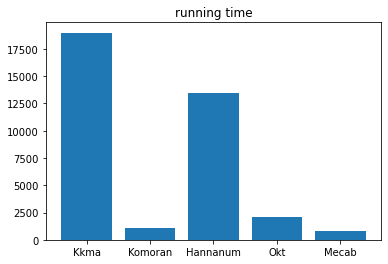

In [8]:
import matplotlib.pyplot as plt
plt.bar(['Kkma', 'Komoran', 'Hannanum', 'Okt', 'Mecab'], 
        [18989.071476221085, 1041.9504737854004, 13424.830045700073, 
        2134.6220133304596, 777.9249513149261])
plt.title("running time")
plt.show()

## 시각화

In [15]:
df_Mecab = pd.read_csv("df_Mecab.csv").dropna()

temp = df_Mecab.values.tolist()
list_Mecab = []
for sentence in temp:
    temp2 = sentence[0].split()
    for vocab in temp2:
        list_Mecab.append(vocab)
series_Mecab = pd.Series(list_Mecab)
Mecab_counts = series_Mecab.value_counts()
Mecab_counts

업         94342
아노락       66186
반집        62932
판매        47742
사이즈       45865
          ...  
EWA           1
도연            1
비류            1
김새움           1
KqgEtR        1
Length: 35850, dtype: int64

<AxesSubplot:title={'center':'Mecab'}>

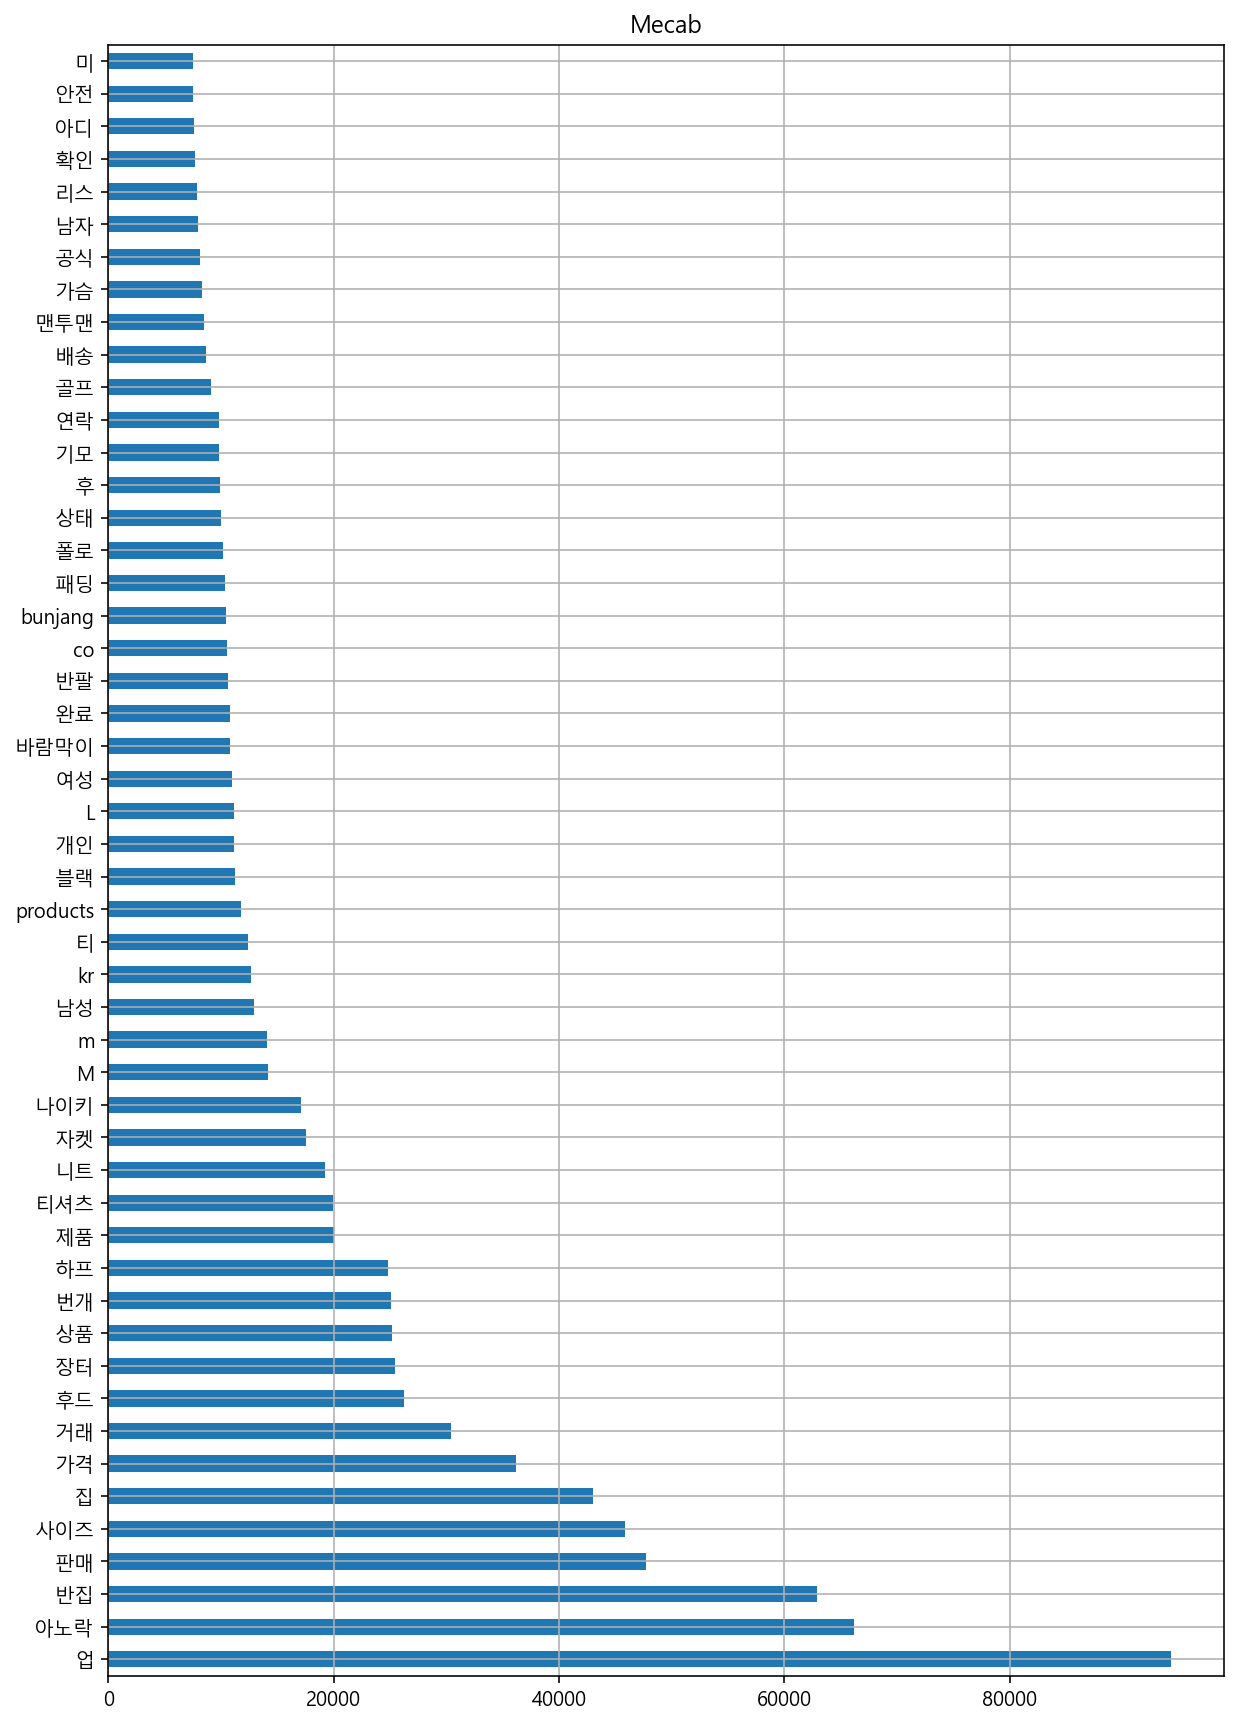

In [16]:
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('font',family = "Malgun Gothic")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
Mecab_counts.head(50).plot(figsize=(10,15),kind='barh',grid=True, title='Mecab')